# Design Thinking & Problem Solving (MINI Project)

# Object Detection and Sorting using OpenCV and Python

# 1. Install Required Libraries

In [89]:
!pip install opencv-python numpy matplotlib pandas


In [91]:
!pip install keyboard


   ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
   ------- -------------------------------- 10.2/58.1 kB ? eta -:--:--
   -------------- ------------------------- 20.5/58.1 kB 330.3 kB/s eta 0:00:01
   ----------------------------------- ---- 51.2/58.1 kB 440.4 kB/s eta 0:00:01
   ---------------------------------------- 58.1/58.1 kB 382.9 kB/s eta 0:00:00


# 2. Load and Display the Image

In [100]:
import cv2
import os

image_path = r"C:\Users\hp\Desktop\Coding\DT PROJECT\objects.jpg"

# Check if the file exists
if not os.path.exists(image_path):
    print("Error: File not found at", image_path)
else:
    image = cv2.imread(image_path)
    if image is None:
        print("Error: OpenCV could not read the image. Check the file format.")
    else:
        print("Image loaded successfully!")


Image loaded successfully!


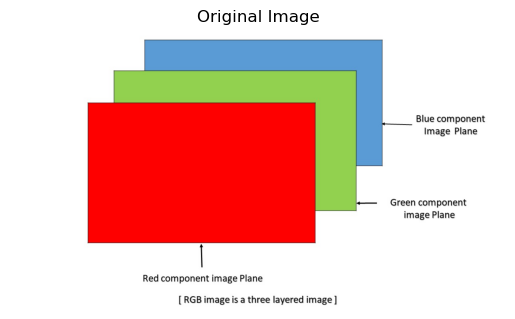

In [102]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('objects.jpg')

# Convert from BGR (OpenCV default) to RGB for correct visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Original Image")
plt.show()


# 3. Convert to Grayscale and Apply Preprocessing

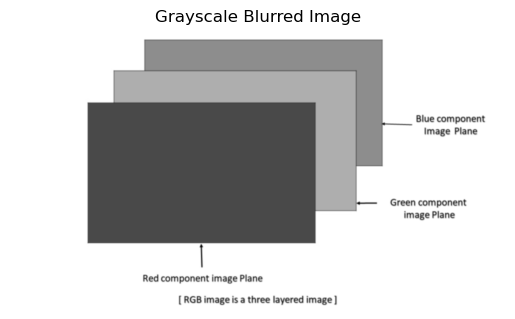

In [104]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to smooth the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Display the grayscale image
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.title("Grayscale Blurred Image")
plt.show()


# 4. Object Detection Using Contour Detection

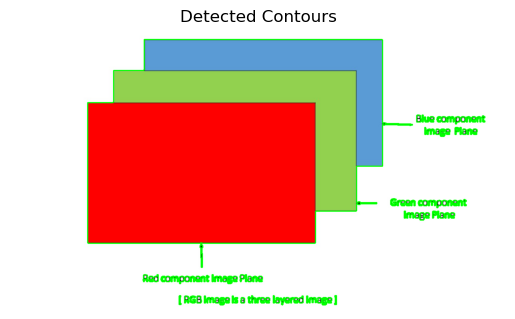

In [106]:
# Detect edges using Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)

# Display the image with detected contours
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Contours")
plt.show()


# 5. Object Classification Based on Color

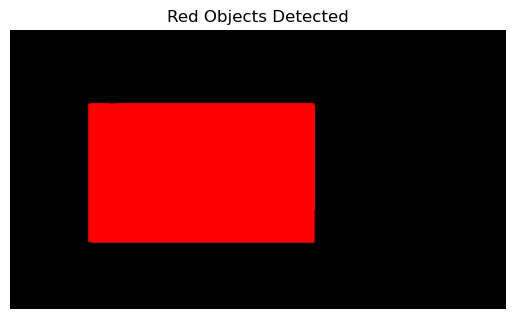

In [108]:
# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define range for a specific color (e.g., Red)
lower_red = (0, 120, 70)
upper_red = (10, 255, 255)

# Create a mask for red color
mask = cv2.inRange(hsv, lower_red, upper_red)

# Apply mask to extract red objects
red_objects = cv2.bitwise_and(image, image, mask=mask)

# Display the extracted red objects
plt.imshow(cv2.cvtColor(red_objects, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Red Objects Detected")
plt.show()


# 6. Optional: Real-Time Object Detection Using Webcam

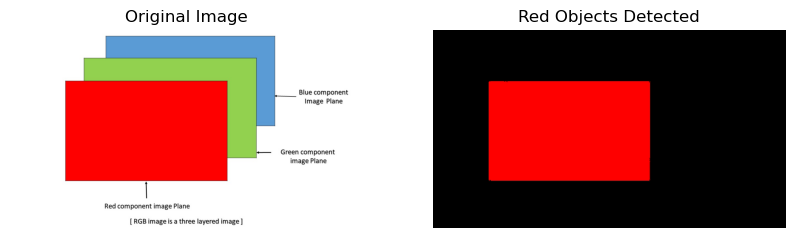

In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
frame = cv2.imread("C:\\Users\\hp\\Desktop\\Coding\\DT PROJECT\\objects.jpg")
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Define color range for red
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])
mask = cv2.inRange(hsv, lower_red, upper_red)
result = cv2.bitwise_and(frame, frame, mask=mask)

# Convert BGR to RGB for correct color display
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display images using matplotlib
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(frame_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result_rgb)
plt.title("Red Objects Detected")
plt.axis("off")

plt.show()


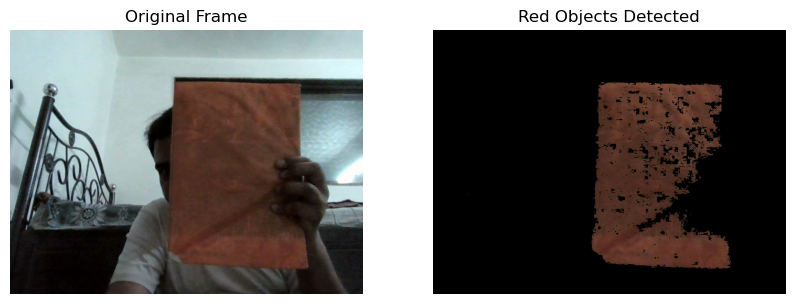

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


<Figure size 640x480 with 0 Axes>

In [120]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open webcam
cap = cv2.VideoCapture(0)

# Define color range for red
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_red, upper_red)
    result = cv2.bitwise_and(frame, frame, mask=mask)

    # Convert images to RGB (for correct color display in Matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    # Display using Matplotlib
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(frame_rgb)
    plt.title("Original Frame")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(result_rgb)
    plt.title("Red Objects Detected")
    plt.axis("off")

    plt.show(block=False)
    plt.pause(0.01)
    plt.clf()  # Clear figure for next frame

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
        break

cap.release()
cv2.destroyAllWindows()
plt.close()


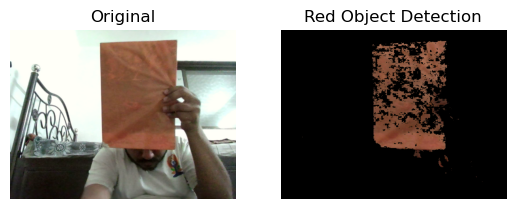

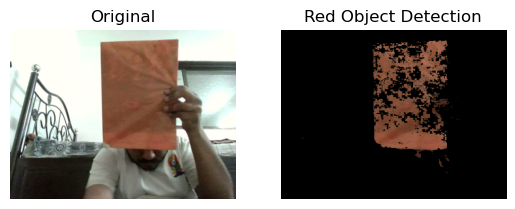

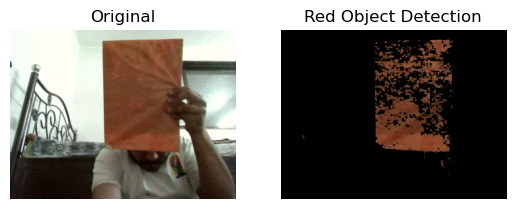

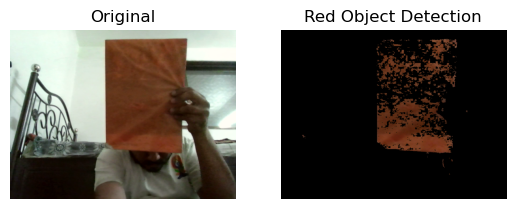

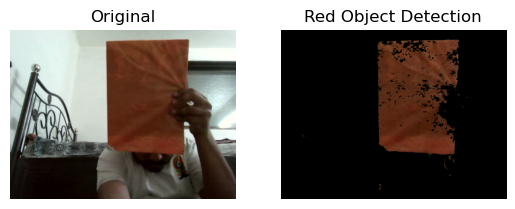

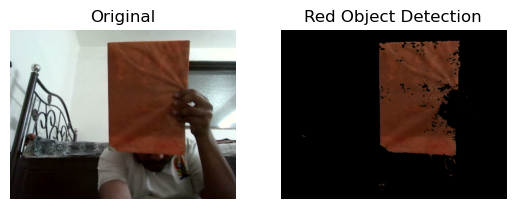

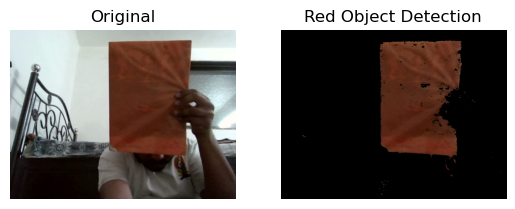

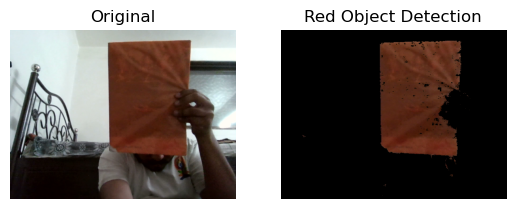

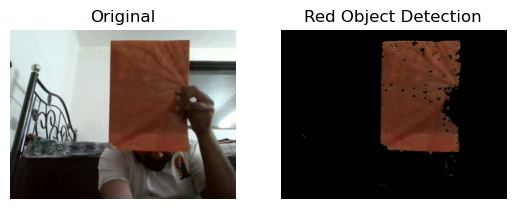

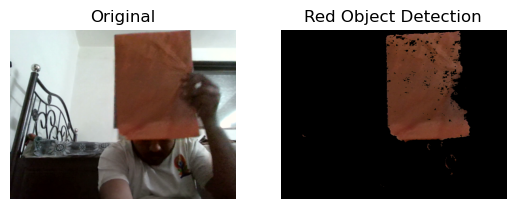

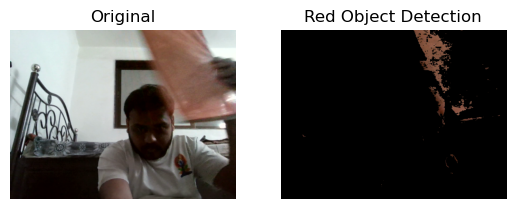

Stopping...


In [124]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keyboard  # Detect key presses

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam")
    cap.release()
    exit()

# Define lower and upper bounds for red color in HSV space
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Convert frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Create mask to detect red color
    mask = cv2.inRange(hsv, lower_red, upper_red)
    result = cv2.bitwise_and(frame, frame, mask=mask)

    # Convert to RGB for Matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    # Display using Matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(frame_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(result_rgb)
    plt.title("Red Object Detection")
    plt.axis("off")

    plt.show(block=False)
    plt.pause(0.01)
    plt.clf()  # Clear figure for next frame

    # ✅ Stop if 'q' is pressed
    if keyboard.is_pressed('q'):
        print("Stopping...")
        break

cap.release()
plt.close()
